## Home Task
### Apply various clustering algorithms

- Agglomerative clustering using complete linkage
- Agglomerative clustering using single linkage
- DBSCAN
- Use elbow method to determine the best k for Kmeans

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, make_scorer


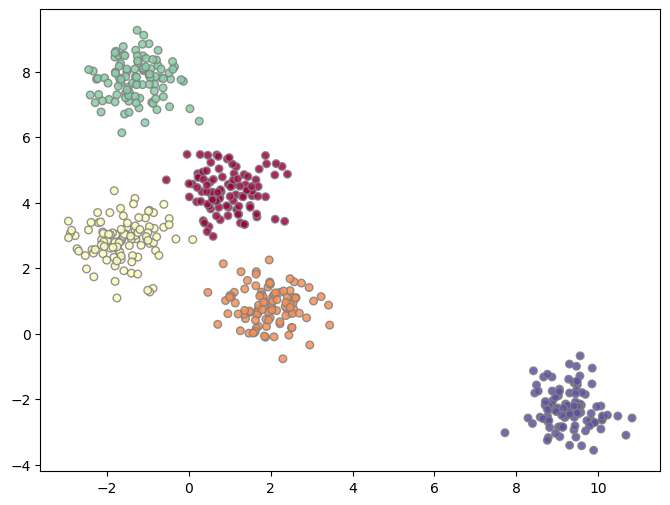

In [4]:
# генерація датасету ідентичного з домашки
X_new, y_new = make_blobs(n_samples=500, n_features=2, centers=5,cluster_std=0.6, random_state=0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y_new)))])
plt.figure(figsize=(8,6))

plt.scatter(X_new[:,0], X_new[:,1], c= colors[y_new], s= 30, alpha=0.85, edgecolor='gray')


In [5]:
def run_sklearn_clust(X, n_clusters=None, linkage=None):
    X_scaled = StandardScaler().fit_transform(X)

    metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

    n = len(metrics)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        ax = axes[idx]

        model = AgglomerativeClustering(
            n_clusters=n_clusters,
            metric=metric,
            linkage=linkage
        )
        labels = model.fit_predict(X_scaled)

        ax.scatter(
            X_scaled[:,0], X_scaled[:,1],
            c=labels, alpha=0.85, edgecolor='gray', s=30
        )
        ax.set_title(f'metric={metric}\nlinkage={linkage}')

    for j in range(idx+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Agglomerative clustering (linkage={linkage}, clusters={n_clusters})', fontsize=14)
    fig.tight_layout()

    plt.show()


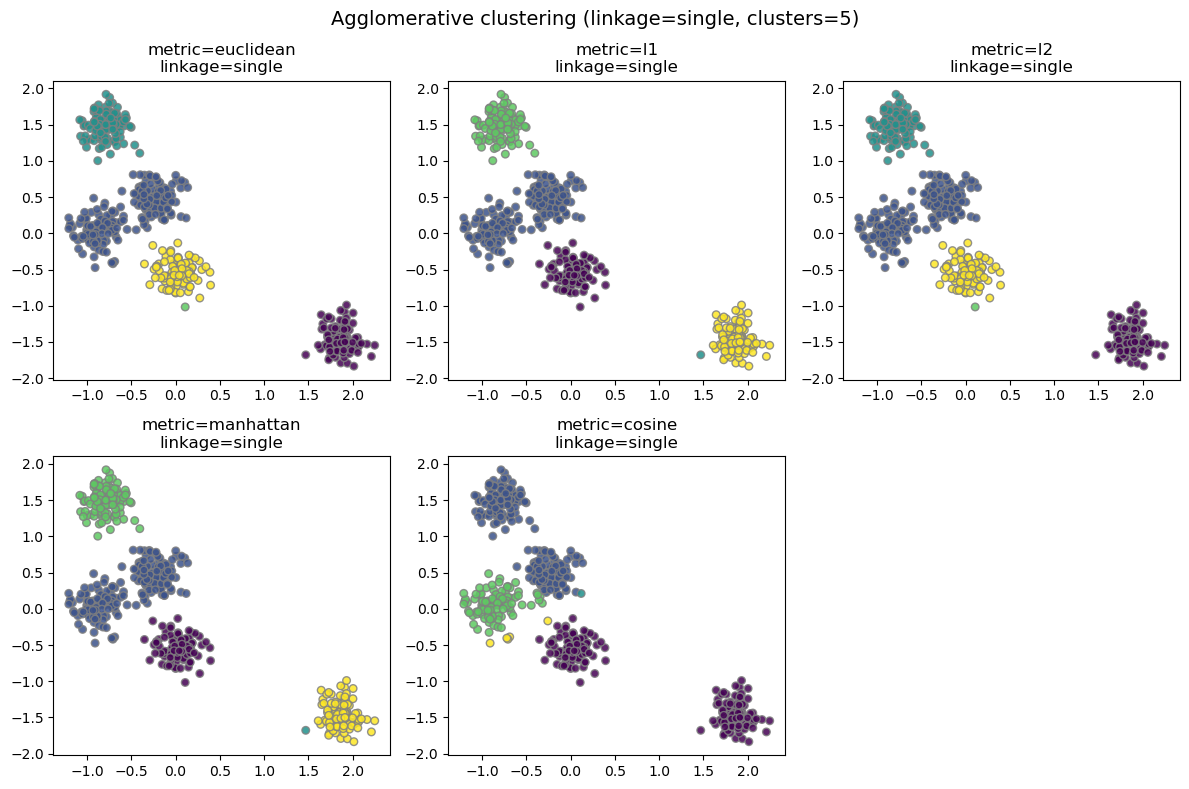

In [ ]:
run_sklearn_clust(X_new, n_clusters=5, linkage='single')


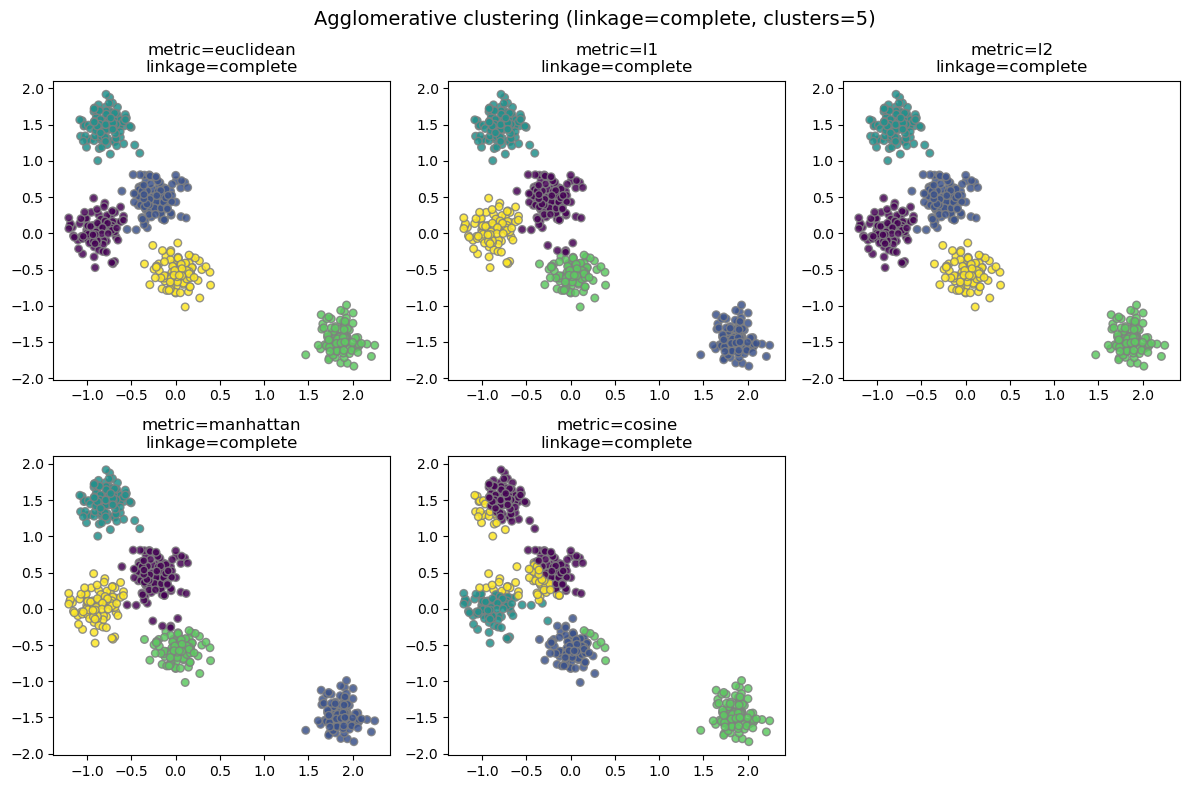

In [102]:
run_sklearn_clust(X_new, n_clusters=5, linkage='complete')


---


## DBSCAN

In [169]:
# optimal eps
from sklearn.neighbors import NearestNeighbors
def find_k_distance(X, k=None):
    k = k
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(X)
    distances, indices = nbrs.kneighbors(X)

    k_distances = np.sort(distances[:,k-1])

    plt.figure(figsize=(8,6))
    plt.plot(k_distances)
    plt.xlabel('Data point')
    plt.ylabel(f'Distance to {k} nearest neighbor')
    plt.title('K-distance plot for choos eps')
    plt.grid(True)
    plt.show()


In [ ]:
def run_dbscan(X, eps=None, min_samples=None, algorithm=None):
    if eps is None:
        eps = 0.5
    if algorithm is None:
        algorithm='auto'
    if min_samples is None:
        min_samples=5

    X_scaled = StandardScaler().fit_transform(X)
    metrics = ['euclidean', 'manhattan', 'l2','chebyshev','cosine','jaccard']

    n = len(metrics)
    ncols = 3
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        ax = axes[idx]

        model = DBSCAN(
        eps=eps,
        min_samples=min_samples,
        metric=metric,
        algorithm=algorithm,
        n_jobs=None )

        labels = model.fit_predict(X_scaled)

        ax.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, alpha=0.85, edgecolor='gray', s=30)
        ax.set_title(f'metric={metric}\neps={eps}')

    for j in range(idx+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'DBSCAN Clustering (algorithm={algorithm}, min_samples={min_samples})', fontsize=14)
    fig.tight_layout()
    fig.show()


/var/folders/gc/s2x5tzvj4dz9sgc9x_cvglz80000gn/T/ipykernel_901/2941758691.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


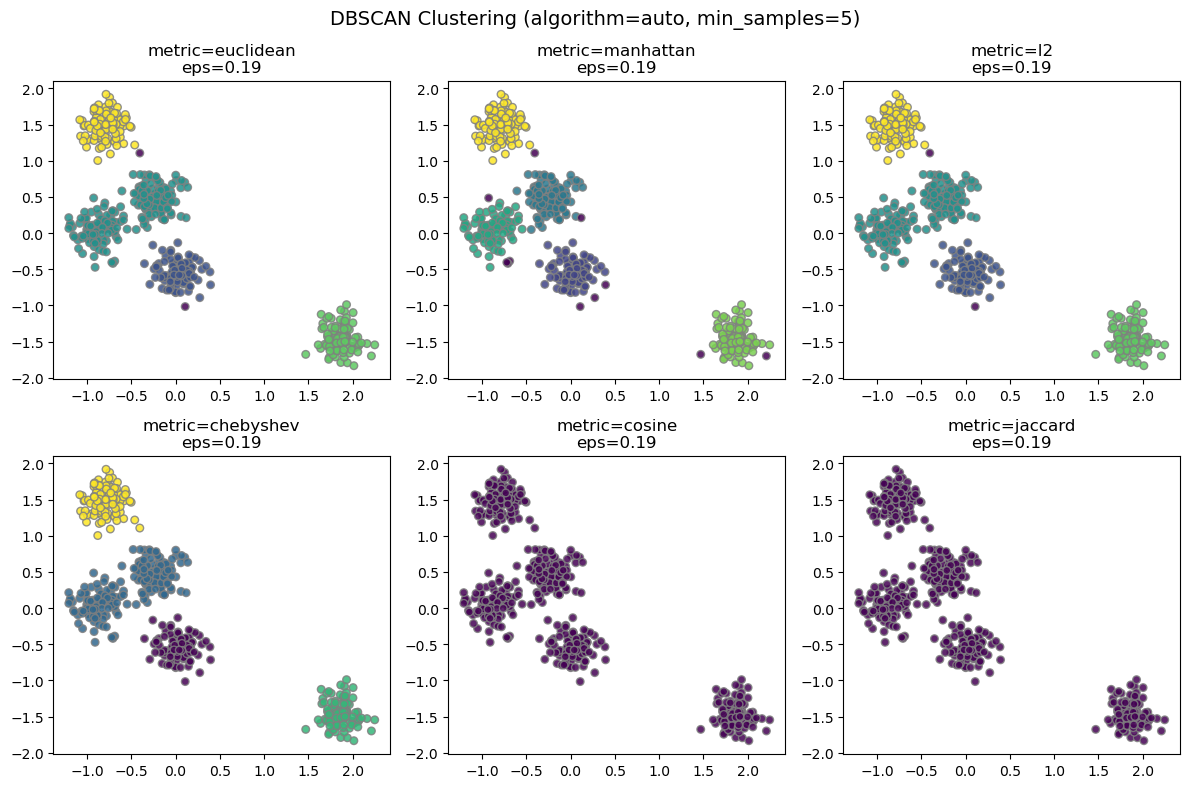

In [ ]:
run_dbscan(X_new, eps=0.19 ,min_samples=5)


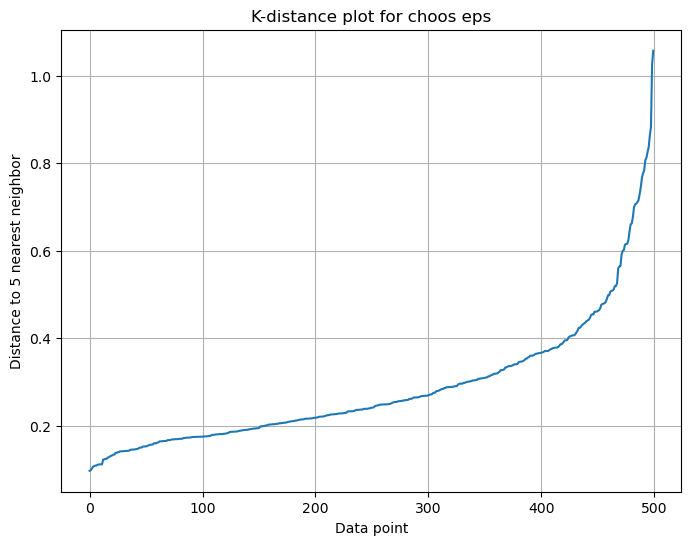

In [170]:
find_k_distance(X_new, k=5)


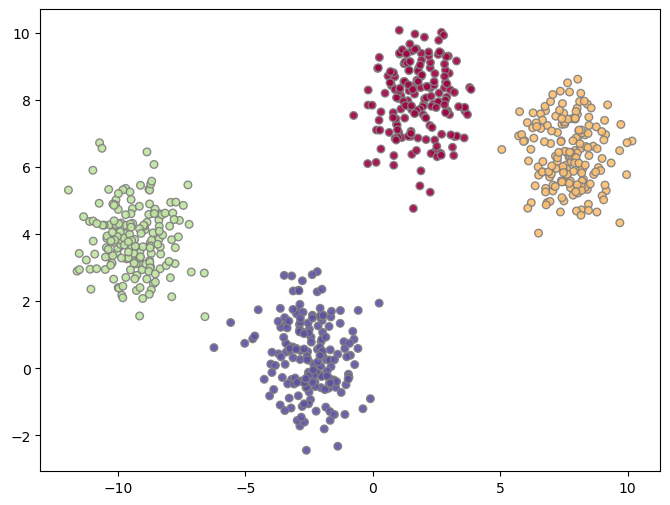

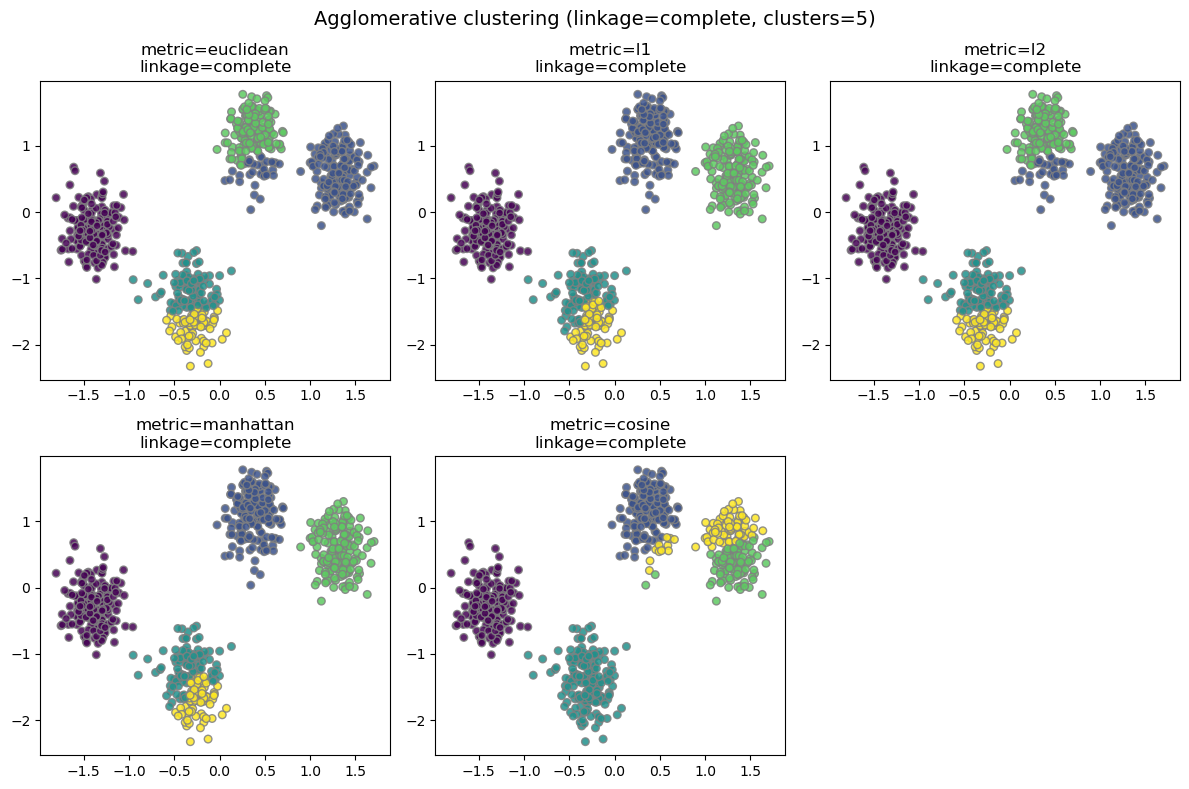

In [166]:
# особиста цікавість

X, y = make_blobs(n_samples=700,
                  n_features=2,
                  centers= 4,
                  cluster_std= 1,
                  random_state=20)

colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 30, alpha=0.9, edgecolor='gray')

run_sklearn_clust(X, n_clusters=5, linkage='complete')


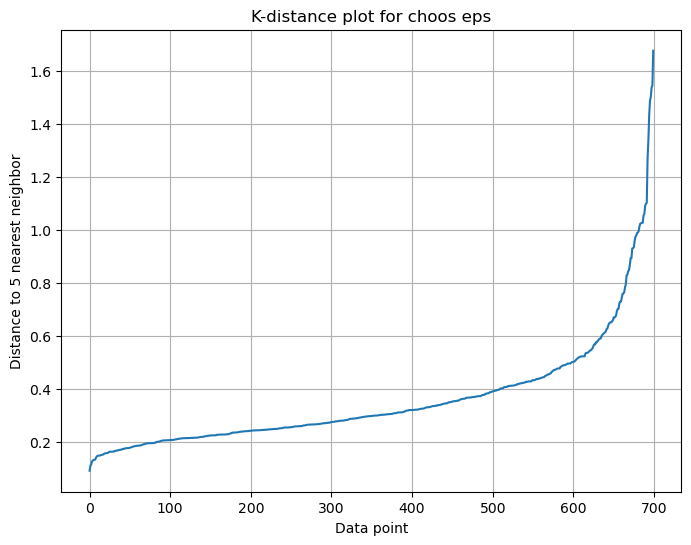

In [171]:
find_k_distance(X, k=5)


Як я зрозумів із інформації із інтернету - на даному графіку немає чіткого ліктя для визначення оптимального eps, свідчить про однорідну щільність даних, наявність шуму\викидів або ж я його не вірно читаю та інтерпретую, у кластеризаціях визначаю вручну eps оптимальне.


/var/folders/gc/s2x5tzvj4dz9sgc9x_cvglz80000gn/T/ipykernel_901/2941758691.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


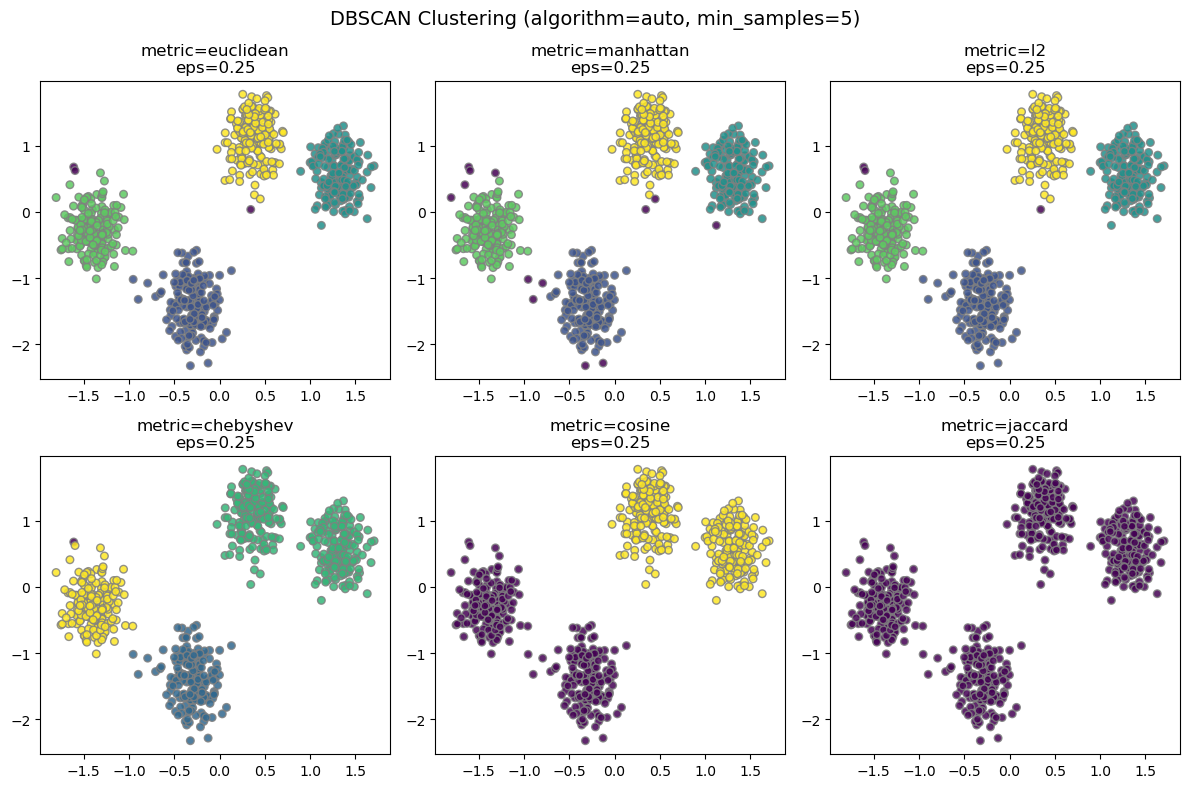

In [165]:
run_dbscan(X,eps=0.25, min_samples=5)
